(<Axes: title={'center': 'High Pass Filtered Image'}>,
 Text(0.5, 1.0, 'High Pass Filtered Image'))

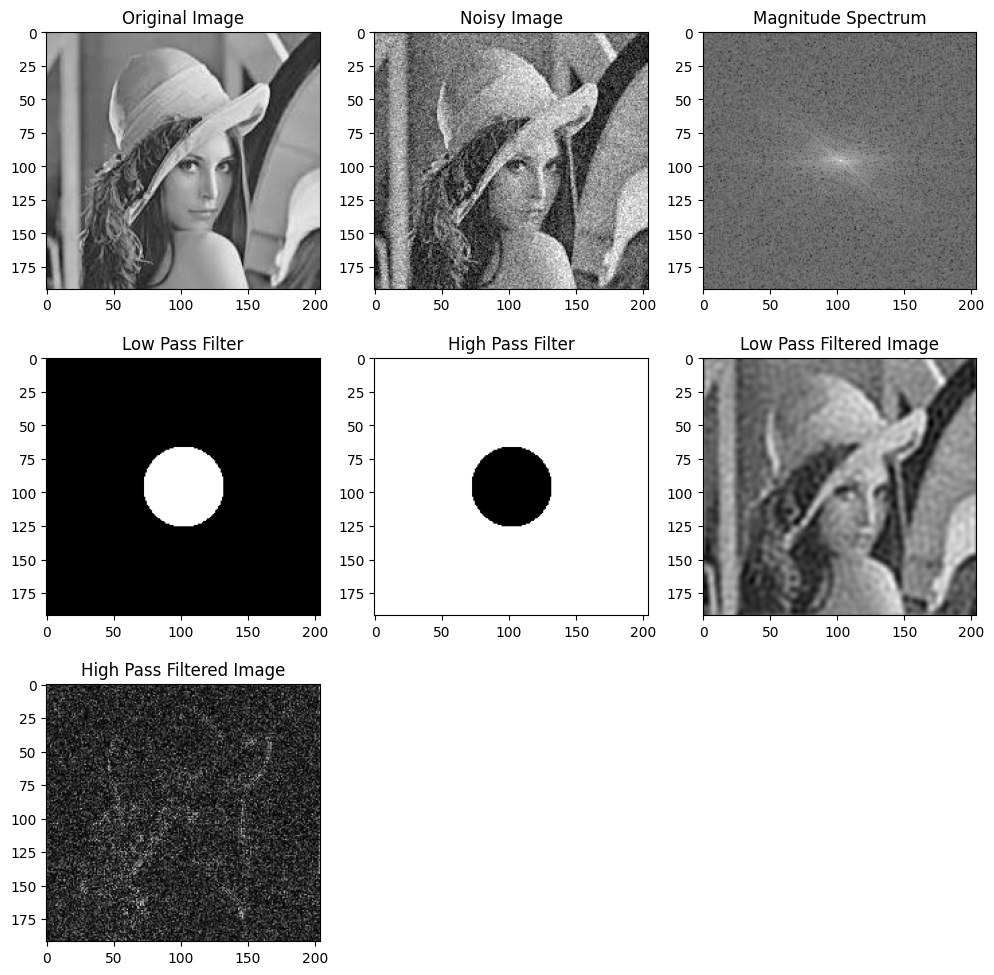

In [5]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image,mean=0,sigma=25):
  gauss= np.random.normal(mean,sigma,image.shape)
  noisy_image= image+gauss
  noisy_image= np.clip(noisy_image,0,255)
  return noisy_image.astype(np.uint8)
def create_low_pass_filter(rows,cols,radius):
  mask=np.zeros((rows,cols),np.float32)
  center=(rows//2,cols//2)
  for i in range(rows):
    for j in range(cols):
      if np.sqrt((i-center[0])**2+(j-center[1])**2) <radius:
        mask[i,j]=1
  return mask
def create_high_pass_filter(rows,cols,radius):
    mask=np.ones((rows,cols),np.float32)
    center=(rows//2,cols//2)
    for i in range(rows):
      for j in range(cols):
        if np.sqrt((i-center[0])**2+(j-center[1])**2) <radius:
          mask[i,j]=0
    return mask

def perform_dft(image):
  dft=cv.dft(np.float32(image),flags=cv.DFT_COMPLEX_OUTPUT)
  dft_shift=np.fft.fftshift(dft)
  magnitude_spectrum =20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])+1)
  return dft_shift,magnitude_spectrum

def apply_filter(dft_shift,filter_mask):
  filtered_dft_shift=dft_shift*filter_mask[:,:,np.newaxis]
  dft_ishift =np.fft.ifftshift(filtered_dft_shift)
  img_back = cv.idft(dft_ishift)
  img_back= cv.magnitude(img_back[:,:,0],img_back[:,:,1])
  return img_back

img=cv.imread('/content/drive/MyDrive/IP/lena.jfif',0)
noisy_image=add_gaussian_noise(img)
rows,cols=img.shape
dft_shift,magnitude_spectrum=perform_dft(noisy_image)
low_pass_filter=create_low_pass_filter(rows,cols,30)
high_pass_filter=create_high_pass_filter(rows,cols,30)
lpt_img=apply_filter(dft_shift,low_pass_filter)
hpt_img=apply_filter(dft_shift,high_pass_filter)

plt.figure(figsize=(12,12))
plt.subplot(331),plt.imshow(img,cmap='gray'),plt.title('Original Image')
plt.subplot(332),plt.imshow(noisy_image,cmap='gray'),plt.title('Noisy Image')
plt.subplot(333),plt.imshow(magnitude_spectrum,cmap='gray'),plt.title('Magnitude Spectrum')
plt.subplot(334),plt.imshow(low_pass_filter,cmap='gray'),plt.title('Low Pass Filter')
plt.subplot(335),plt.imshow(high_pass_filter,cmap='gray'),plt.title('High Pass Filter')
plt.subplot(336),plt.imshow(lpt_img,cmap='gray'),plt.title('Low Pass Filtered Image')
plt.subplot(337),plt.imshow(hpt_img,cmap='gray'),plt.title('High Pass Filtered Image')

(<Axes: title={'center': 'High Pass Filtered Image'}>,
 Text(0.5, 1.0, 'High Pass Filtered Image'))

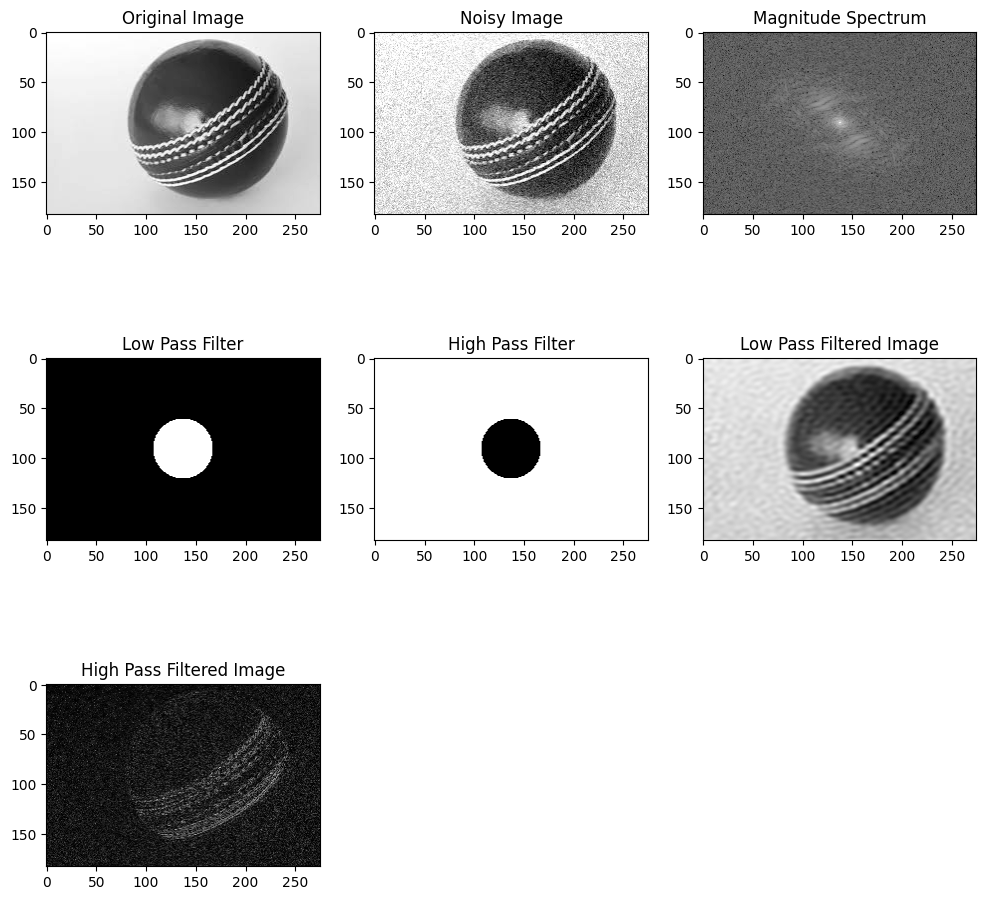

In [6]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image,mean=0,sigma=25):
  gauss= np.random.normal(mean,sigma,image.shape)
  noisy_image= image+gauss
  noisy_image= np.clip(noisy_image,0,255)
  return noisy_image.astype(np.uint8)
def create_low_pass_filter(rows,cols,radius):
  mask=np.zeros((rows,cols),np.float32)
  center=(rows//2,cols//2)
  for i in range(rows):
    for j in range(cols):
      if np.sqrt((i-center[0])**2+(j-center[1])**2) <radius:
        mask[i,j]=1
  return mask
def create_high_pass_filter(rows,cols,radius):
    mask=np.ones((rows,cols),np.float32)
    center=(rows//2,cols//2)
    for i in range(rows):
      for j in range(cols):
        if np.sqrt((i-center[0])**2+(j-center[1])**2) <radius:
          mask[i,j]=0
    return mask

def perform_dft(image):
  dft=cv.dft(np.float32(image),flags=cv.DFT_COMPLEX_OUTPUT)
  dft_shift=np.fft.fftshift(dft)
  magnitude_spectrum =20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])+1)
  return dft_shift,magnitude_spectrum

def apply_filter(dft_shift,filter_mask):
  filtered_dft_shift=dft_shift*filter_mask[:,:,np.newaxis]
  dft_ishift =np.fft.ifftshift(filtered_dft_shift)
  img_back = cv.idft(dft_ishift)
  img_back= cv.magnitude(img_back[:,:,0],img_back[:,:,1])
  return img_back

img=cv.imread('/content/ball.jpg',0)
noisy_image=add_gaussian_noise(img)
rows,cols=img.shape
dft_shift,magnitude_spectrum=perform_dft(noisy_image)
low_pass_filter=create_low_pass_filter(rows,cols,30)
high_pass_filter=create_high_pass_filter(rows,cols,30)
lpt_img=apply_filter(dft_shift,low_pass_filter)
hpt_img=apply_filter(dft_shift,high_pass_filter)

plt.figure(figsize=(12,12))
plt.subplot(331),plt.imshow(img,cmap='gray'),plt.title('Original Image')
plt.subplot(332),plt.imshow(noisy_image,cmap='gray'),plt.title('Noisy Image')
plt.subplot(333),plt.imshow(magnitude_spectrum,cmap='gray'),plt.title('Magnitude Spectrum')
plt.subplot(334),plt.imshow(low_pass_filter,cmap='gray'),plt.title('Low Pass Filter')
plt.subplot(335),plt.imshow(high_pass_filter,cmap='gray'),plt.title('High Pass Filter')
plt.subplot(336),plt.imshow(lpt_img,cmap='gray'),plt.title('Low Pass Filtered Image')
plt.subplot(337),plt.imshow(hpt_img,cmap='gray'),plt.title('High Pass Filtered Image')